<a href="https://colab.research.google.com/github/abouslima/AI-Makerspace/blob/master/VertexAI/Forecast_VertexAI/Forecast_VertexAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting Using Vertex AI

The data is for accidents from three different categories in Munich recorded monthly in Munich (Data Link [link text](https://opendata.muenchen.de/dataset/5e73a82b-7cfb-40cc-9b30-45fe5a3fa24e/resource/40094bd6-f82d-4979-949b-26c8dc00b9a7))

In [43]:
import pandas as pd

accidents = pd.read_csv("Accidents_DPS.csv")
accidents.head()

,DATE,Type,Value
0,2000-01-01,Alkoholunfälle,78.0
1,2000-01-01,Fluchtunfälle,835.0
2,2000-01-01,Verkehrsunfälle,3448.0
3,2000-02-01,Alkoholunfälle,53.0
4,2000-02-01,Fluchtunfälle,890.0


In [44]:
accidents = accidents.groupby(['DATE', 'Type']).sum().unstack(level=1)
accidents = accidents.droplevel(0, axis=1)
accidents.head()

Type,Alkoholunfälle,Fluchtunfälle,Verkehrsunfälle
DATE,,,
2000-01-01,78.0,835.0,3448.0
2000-02-01,53.0,890.0,3181.0
2000-03-01,73.0,974.0,3783.0
2000-04-01,78.0,834.0,3317.0
2000-05-01,96.0,1086.0,4123.0


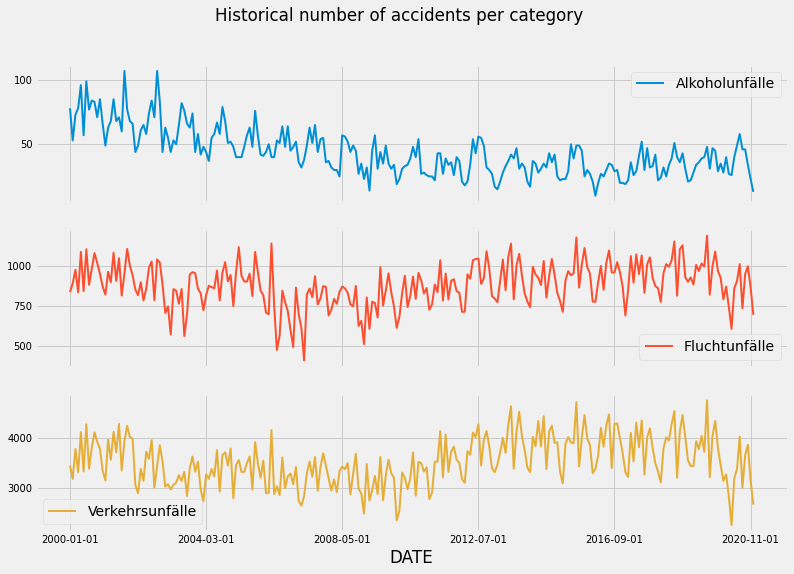

In [45]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
ax = accidents.plot(subplots=True, figsize=(12,8), fontsize=10, linewidth=2,
            title='Historical number of accidents per category')


**We upload the dataset to VertexAI, to run a forecasting model**

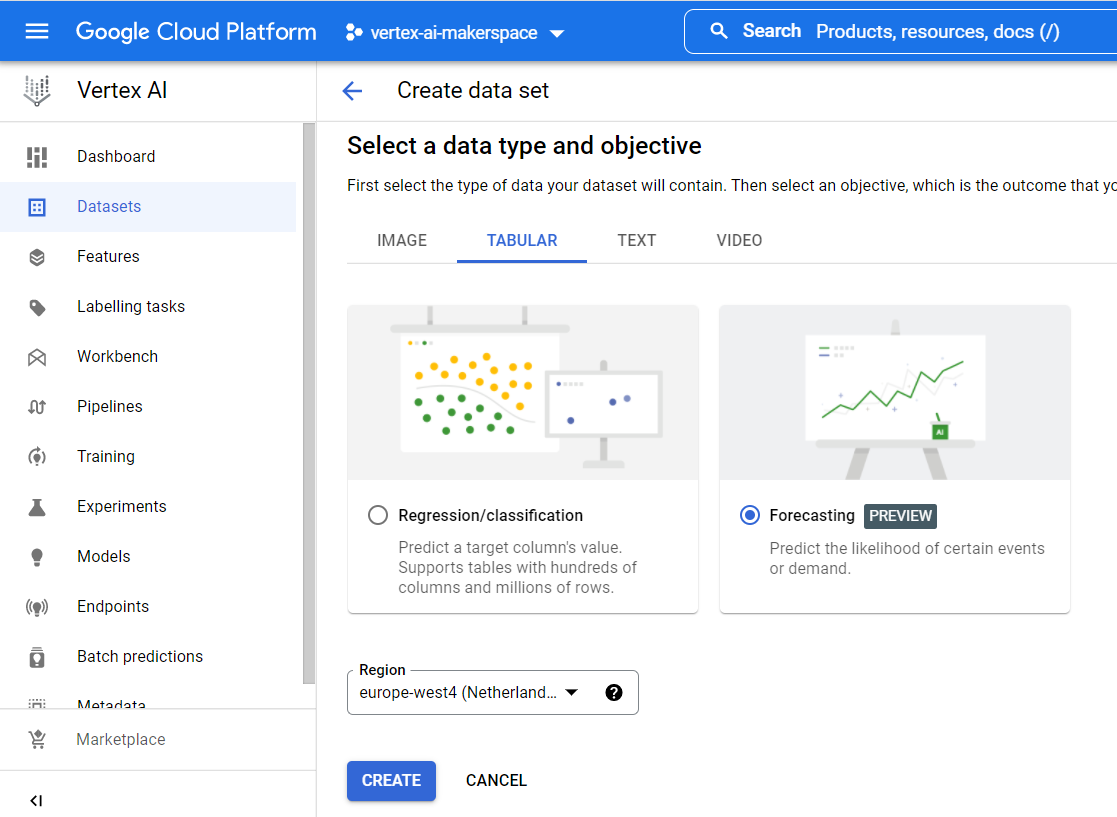



---



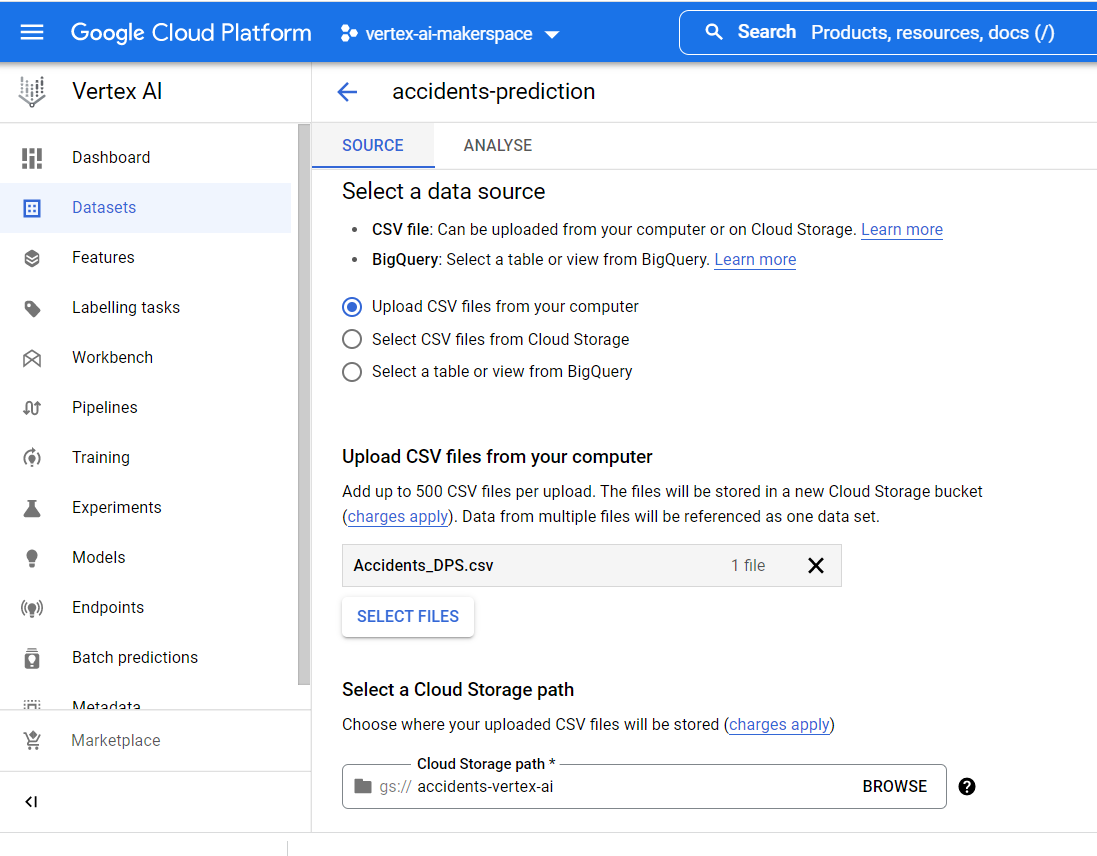



---



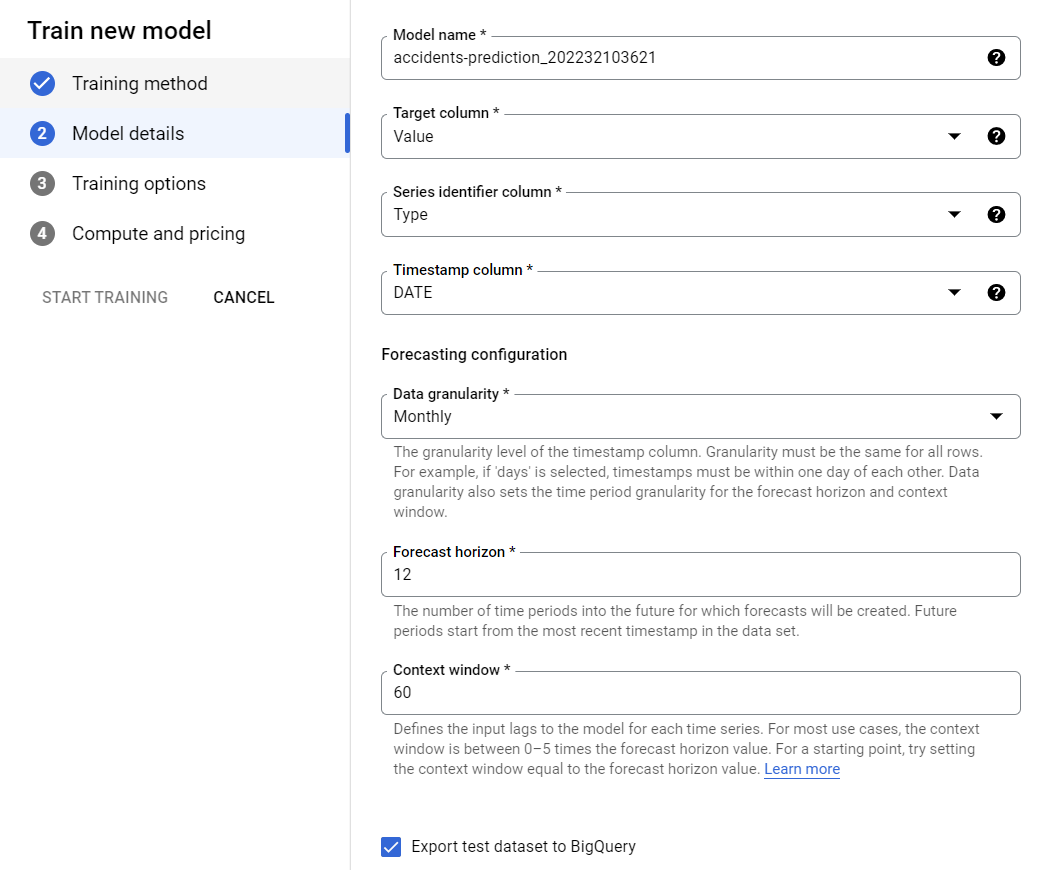



---



**After training is over, a new file with historical data will be uploaded to the google cloud storage, with empty values, for the data to be predicted**

In [46]:
accidents_values = pd.read_csv("Accidents_DPS_Predict.csv")
accidents_values.head()

,DATE,Type,Value
0,2000-01-01,Alkoholunfälle,78.0
1,2000-01-01,Fluchtunfälle,835.0
2,2000-01-01,Verkehrsunfälle,3448.0
3,2000-02-01,Alkoholunfälle,53.0
4,2000-02-01,Fluchtunfälle,890.0


In [47]:
accidents_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    792 non-null    object 
 1   Type    792 non-null    object 
 2   Value   756 non-null    float64
dtypes: float64(1), object(2)
memory usage: 18.7+ KB


In [48]:
accidents_values.tail()

,DATE,Type,Value
787,2021-11-01,Fluchtunfälle,NaN
788,2021-11-01,Verkehrsunfälle,NaN
789,2021-12-01,Alkoholunfälle,NaN
790,2021-12-01,Fluchtunfälle,NaN
791,2021-12-01,Verkehrsunfälle,NaN


After the prediction is complete, the predicted file can be retrieved and plotted

In [49]:
predicted_accidents = pd.read_csv("Accidents_DPS_Predicted.csv")
predicted_accidents.head()

,DATE,Type,Value,predicted_Value
0,2021-07-01,Alkoholunfälle,NaN,42.025177
1,2021-04-01,Fluchtunfälle,NaN,944.447449
2,2021-02-01,Verkehrsunfälle,NaN,3174.366943
3,2021-05-01,Verkehrsunfälle,NaN,3920.322266
4,2021-11-01,Verkehrsunfälle,NaN,3867.462646


In [50]:
predicted_accidents["DATE"] = pd.to_datetime(predicted_accidents["DATE"])
predicted_accidents.drop("Value", axis=1, inplace=True)
predicted_accidents = predicted_accidents.groupby(['DATE', 'Type']).sum().unstack(level=1)
predicted_accidents = predicted_accidents.droplevel(0, axis=1)
predicted_accidents

Type,Alkoholunfälle,Fluchtunfälle,Verkehrsunfälle
DATE,,,
2021-01-01,21.690121,787.709167,3190.892822
2021-02-01,20.389606,779.927429,3174.366943
2021-03-01,26.509771,927.035767,3760.873779
2021-04-01,28.095667,944.447449,3828.543701
2021-05-01,29.740156,966.739685,3920.322266
2021-06-01,30.727415,972.701477,3932.611816
2021-07-01,42.025177,1097.142578,4374.586914
2021-08-01,24.783295,812.430725,3264.738037
2021-09-01,32.470531,995.935181,4012.694580
